In [ ]:
!sudo cp -r /content/drive/MyDrive/consultancy/ /content/
%cd /content/consultancy/

/content/consultancy


In [ ]:
!pip install -U scikit-learn
!pip install delayed

     |████████████████████████████████| 22.3 MB 70.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 85 kB 3.4 MB/s 
     |████████████████████████████████| 72 kB 551 kB/s 


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns

In [ ]:
print("a => Nifty50")
print("b => BSE Sensex")
option = input("Select file")
if option=="a":
  File = "nifty_stock_data.csv"
elif option == "b":
  File = "BSE_stock_data.csv"

path = "/content/consultancy/" + File

df = pd.read_csv(path, index_col=False)

# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)
# df.dropna(axis=0,inplace=True)
df

a => Nifty50
b => BSE Sensex
Select fileb


,Date,Close,compound,negative,neutral,positive,Open,High,Low,monthly_return,yearly_return
0,2007-01-02,13942.24,-0.9959,0.162,0.733,0.104,13827.77,13980.54,13797.44,2.964445,4.511829
1,2007-01-03,14014.92,-0.9942,0.126,0.804,0.070,13969.45,14035.67,13897.42,2.768335,1.986454
2,2007-01-04,13871.71,-0.9979,0.175,0.742,0.082,14029.04,14060.35,13850.38,2.751427,1.693158
3,2007-01-05,13860.52,-0.9978,0.133,0.815,0.052,13768.79,13971.82,13763.39,2.366217,2.594059
4,2007-01-08,13652.15,-0.9912,0.117,0.793,0.090,13855.89,13855.89,13599.87,2.704043,5.637720
...,...,...,...,...,...,...,...,...,...,...,...
3600,2021-07-15,53158.85,0.0000,0.000,1.000,0.000,52968.89,53266.12,52948.43,NaN,NaN
3601,2021-07-16,53140.06,0.2960,0.000,0.833,0.167,53244.40,53290.81,52997.09,NaN,NaN
3602,2021-07-19,52553.40,0.0000,0.000,1.000,0.000,52606.99,52821.17,52405.89,NaN,NaN
3603,2021-07-20,52198.51,0.5574,0.000,0.753,0.247,52432.88,52465.03,52013.51,NaN,NaN


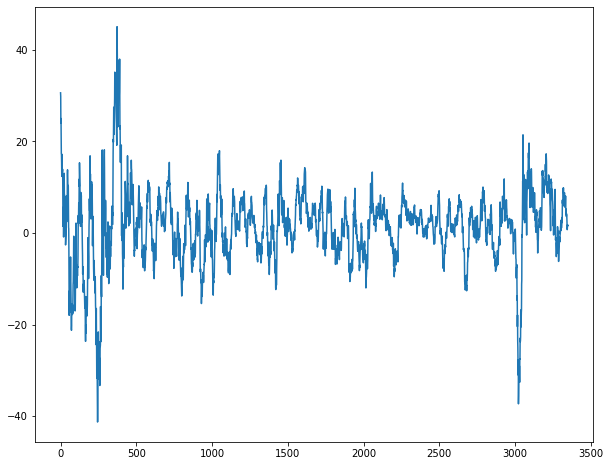

In [ ]:
df['monthly_return'].plot()

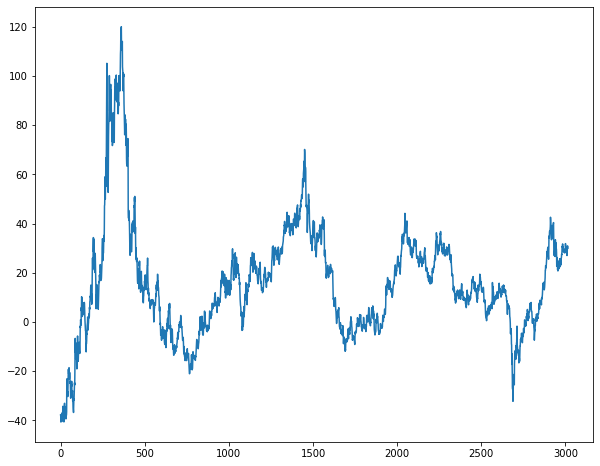

In [ ]:
df['yearly_return'].plot()

In [ ]:
train_dates = pd.to_datetime(df['Date'])
train_dates = train_dates[:-30]
train_dates

0      2007-01-02
1      2007-01-03
2      2007-01-04
3      2007-01-05
4      2007-01-08
          ...    
3570   2021-06-03
3571   2021-06-04
3572   2021-06-07
3573   2021-06-08
3574   2021-06-09
Name: Date, Length: 3575, dtype: datetime64[ns]

In [ ]:
# For year

# df_input=df[['Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'yearly_return']]
# df_input = df_input.dropna(axis=0)
# df_pred_input=df[-365:][['Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'monthly_return']]
# df_input.tail()
# For month

df_for_training=df[['Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'monthly_return']].astype(float)
df_for_training = df_for_training.dropna(axis=0)
# df_pred_input=df[-30:][['Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low']]
df_for_training

,Close,compound,negative,neutral,positive,Open,High,Low,monthly_return
0,13942.24,-0.9959,0.162,0.733,0.104,13827.77,13980.54,13797.44,2.964445
1,14014.92,-0.9942,0.126,0.804,0.070,13969.45,14035.67,13897.42,2.768335
2,13871.71,-0.9979,0.175,0.742,0.082,14029.04,14060.35,13850.38,2.751427
3,13860.52,-0.9978,0.133,0.815,0.052,13768.79,13971.82,13763.39,2.366217
4,13652.15,-0.9912,0.117,0.793,0.090,13855.89,13855.89,13599.87,2.704043
...,...,...,...,...,...,...,...,...,...
3570,52232.43,0.0000,0.000,1.000,0.000,52121.58,52273.23,51942.20,1.773649
3571,52100.05,0.0000,0.000,1.000,0.000,52367.52,52389.02,51952.70,1.996179
3572,52328.51,0.0772,0.000,0.843,0.157,52231.38,52378.69,52054.76,0.429766
3573,52275.57,-0.5106,0.398,0.602,0.000,52428.72,52432.43,52135.04,-0.147411


In [ ]:
scaler = MinMaxScaler()

df_for_training_scaled = scaler.fit_transform(df_for_training)
# df_pred_input = scaler.fit_transform(df_pred_input)
# df_for_training_scaled=df_for_training.to_numpy()

In [ ]:
trainX = []
trainY = []

n_future = 1   # Number of days we want to predict into the future
n_past = 30    # Number of past days we want to use to predict the future

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, -1])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (3545, 30, 9).
trainY shape == (3545, 1).


In [ ]:
trainY

array([[0.30423214],
       [0.31410187],
       [0.33692796],
       ...,
       [0.45585495],
       [0.44945138],
       [0.47021606]])

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 30, 64)            18944     
_________________________________________________________________
lstm_19 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 31,393
Trainable params: 31,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(trainX, trainY, epochs=30, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/30
200/200 [==============================] - 22s 96ms/step - loss: 0.0411 - val_loss: 0.0065
Epoch 2/30
200/200 [==============================] - 18s 91ms/step - loss: 0.0069 - val_loss: 0.0048
Epoch 3/30
200/200 [==============================] - 19s 96ms/step - loss: 0.0054 - val_loss: 0.0039
Epoch 4/30
200/200 [==============================] - 19s 94ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 5/30
200/200 [==============================] - 18s 91ms/step - loss: 0.0038 - val_loss: 0.0061
Epoch 6/30
200/200 [==============================] - 18s 90ms/step - loss: 0.0034 - val_loss: 0.0039
Epoch 7/30
200/200 [==============================] - 19s 95ms/step - loss: 0.0030 - val_loss: 0.0058
Epoch 8/30
200/200 [==============================] - 18s 92ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 9/30
200/200 [==============================] - 19s 94ms/step - loss: 0.0025 - val_loss: 0.0048
Epoch 10/30
200/200 [==============================] - 18s 90ms/step - loss: 0.002

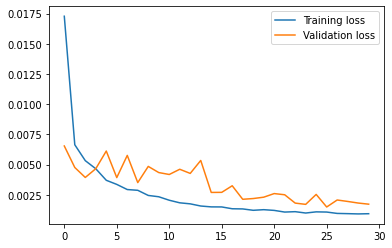

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
n_future=30  #Redefining n_future to extend prediction dates beyond original n_future dates...
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()

forecast = model.predict(trainX[-n_future:]) #forecast 

In [ ]:
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,-1]
y_pred_future

array([ 3.4921224 ,  3.836159  ,  1.3860453 ,  4.810951  ,  2.8723397 ,
        4.911227  ,  2.9962432 ,  3.7789433 ,  4.319703  ,  4.265171  ,
        1.8389883 ,  3.369017  ,  2.157243  ,  0.9368199 ,  3.1664698 ,
        2.9584618 ,  1.454476  ,  1.5731305 ,  1.5877407 ,  1.0103061 ,
       -0.7364845 , -0.65803427, -1.1572524 , -1.1749705 , -1.8399671 ,
       -0.92674756, -0.8952036 , -1.0335048 , -2.2117333 , -1.4146138 ],
      dtype=float32)

In [ ]:
# Convert timestamp to date
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'monthly_return':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [ ]:
original = df[['Date', 'monthly_return']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-01-16']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


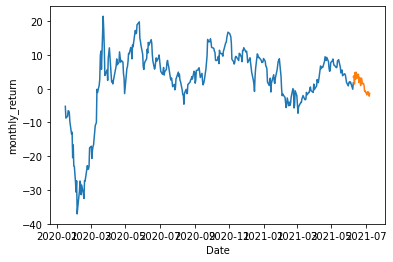

In [ ]:
sns.lineplot(original['Date'], original['monthly_return'])
sns.lineplot(df_forecast['Date'], df_forecast['monthly_return'])  